In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

caminho_arquivo = r'C:\Users\lucas\Downloads\archive\Electric_Vehicle_Population_Data.csv'
df = pd.read_csv(caminho_arquivo)

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.rename(columns={
    'VIN (1-10)': 'Número de chassi',
    'County': 'Local de registro',
    'City': 'Cidade de registro',
    'State': 'Estado de registro',
    'Postal Code': 'Código postal de registro',
    'Model Year': 'Ano de fabricação',
    'Make': 'Fabricante',
    'Model': 'Modelo específico',
    'Electric Vehicle Type': 'Tipo de veículo elétrico (BEV ou PHEV)',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'Elegibilidade para Veículos de Combustível Alternativo Limpo (CAFV)'
}, inplace=True)

In [46]:
colunas_para_manter = [
    'Número de chassi', 'Local de registro', 'Cidade de registro', 'Estado de registro', 'Código postal de registro',
    'Ano de fabricação', 'Fabricante', 'Modelo específico', 'Tipo de veículo elétrico (BEV ou PHEV)',
    'Elegibilidade para Veículos de Combustível Alternativo Limpo (CAFV)'
]

df = df[colunas_para_manter]

In [47]:
df.dropna(subset=['Local de registro', 'Cidade de registro', 'Código postal de registro'], inplace=True)

In [48]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

Número de chassi                                                       0
Local de registro                                                      0
Cidade de registro                                                     0
Estado de registro                                                     0
Código postal de registro                                              0
Ano de fabricação                                                      0
Fabricante                                                             0
Modelo específico                                                      0
Tipo de veículo elétrico (BEV ou PHEV)                                 0
Elegibilidade para Veículos de Combustível Alternativo Limpo (CAFV)    0
dtype: int64


In [49]:
print(df.head())

  Número de chassi Local de registro Cidade de registro Estado de registro  \
0       1C4JJXP66P            Kitsap            Poulsbo                 WA   
1       1G1FX6S08K         Snohomish       Lake Stevens                 WA   
2       WBY1Z2C58F              King            Seattle                 WA   
3       5YJ3E1EBXK              King            Seattle                 WA   
4       5YJSA1V24F            Yakima              Selah                 WA   

   Código postal de registro  Ano de fabricação Fabricante Modelo específico  \
0                    98370.0               2023       JEEP          WRANGLER   
1                    98258.0               2019  CHEVROLET           BOLT EV   
2                    98116.0               2015        BMW                I3   
3                    98178.0               2019      TESLA           MODEL 3   
4                    98942.0               2015      TESLA           MODEL S   

   Tipo de veículo elétrico (BEV ou PHEV)  \
0  Pl

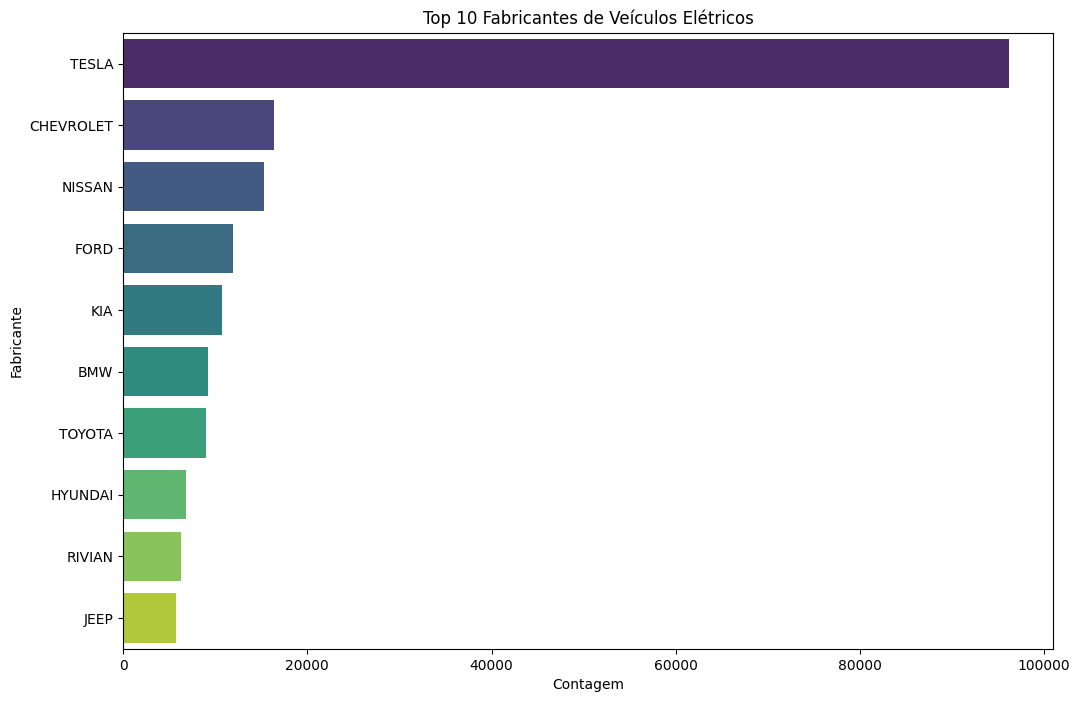

In [50]:
fabricante_counts = df['Fabricante'].value_counts().head(10)  # Exibindo os 10 principais fabricantes

plt.figure(figsize=(12, 8))
sns.barplot(x=fabricante_counts.values, y=fabricante_counts.index, palette='viridis')
plt.title('Top 10 Fabricantes de Veículos Elétricos')
plt.xlabel('Contagem')
plt.ylabel('Fabricante')
plt.show()

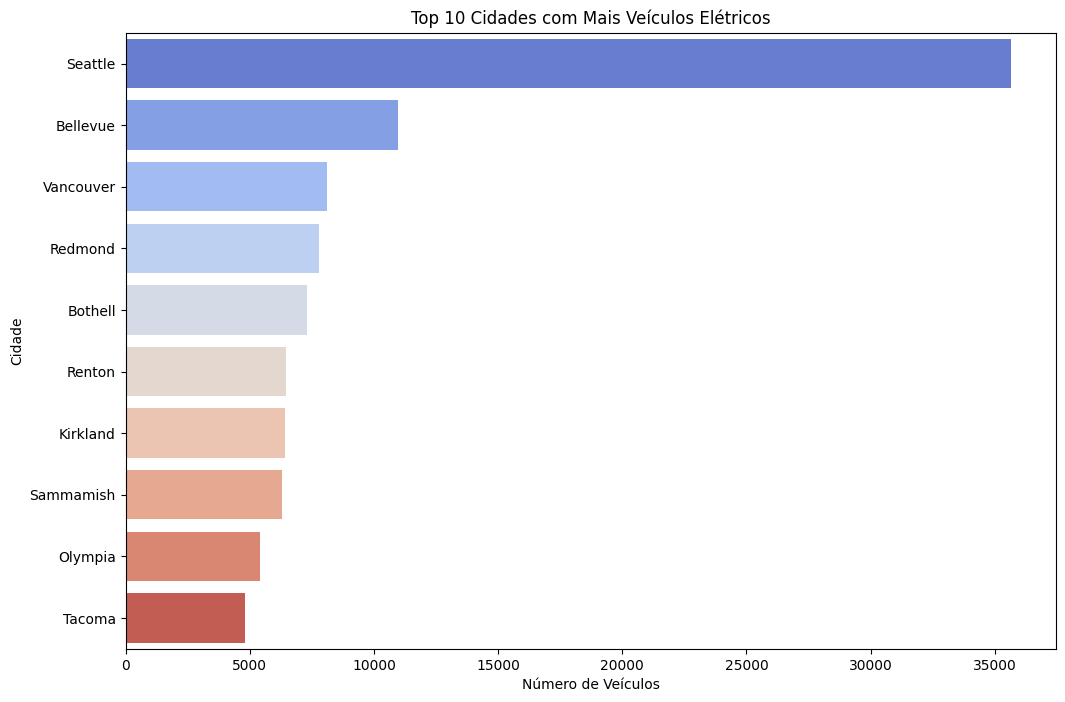

In [51]:
cidade_counts = df['Cidade de registro'].value_counts().head(10)  # Exibindo as 10 principais cidades

plt.figure(figsize=(12, 8))
sns.barplot(x=cidade_counts.values, y=cidade_counts.index, palette='coolwarm')
plt.title('Top 10 Cidades com Mais Veículos Elétricos')
plt.xlabel('Número de Veículos')
plt.ylabel('Cidade')
plt.show()

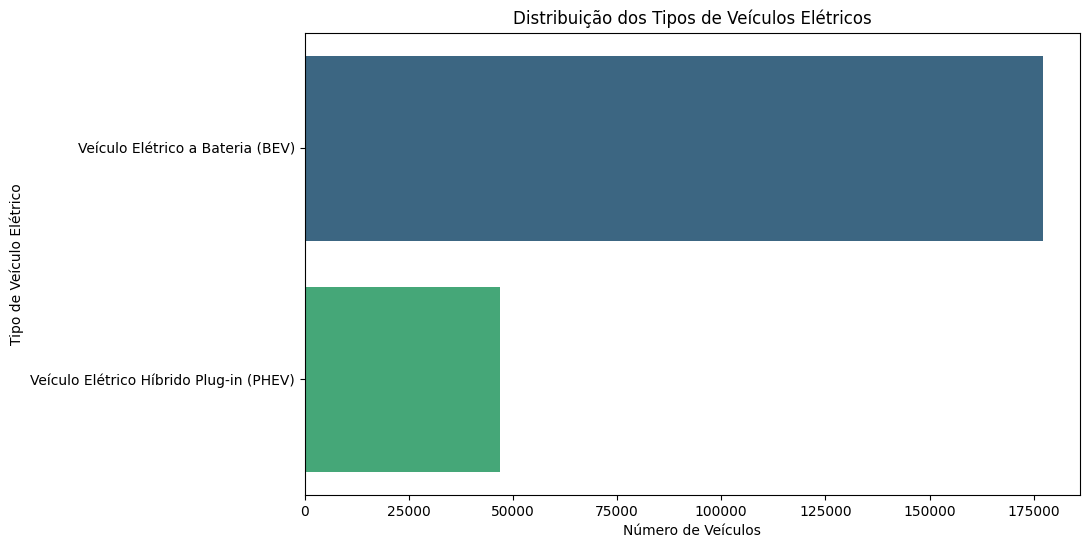

In [52]:
tipo_veiculo_counts = df['Tipo de veículo elétrico (BEV ou PHEV)'].value_counts().reset_index()
tipo_veiculo_counts.columns = ['Tipo de veículo elétrico (BEV ou PHEV)', 'Contagem']

tipo_veiculo_counts['Tipo de veículo elétrico (BEV ou PHEV)'] = tipo_veiculo_counts['Tipo de veículo elétrico (BEV ou PHEV)'].replace({
    'Battery Electric Vehicle (BEV)': 'Veículo Elétrico a Bateria (BEV)',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'Veículo Elétrico Híbrido Plug-in (PHEV)'
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Contagem', y='Tipo de veículo elétrico (BEV ou PHEV)', data=tipo_veiculo_counts, palette='viridis')
plt.title('Distribuição dos Tipos de Veículos Elétricos')
plt.xlabel('Número de Veículos')
plt.ylabel('Tipo de Veículo Elétrico')
plt.show()